## 0 Load modules:

In [1]:
# general package
import numpy as np
import xarray as xr
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# teos10 package
import gsw

# package for the inset
import cartopy.crs as ccrs
import cartopy
from netCDF4 import Dataset
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## 1 Load data:
### 1.1 Load Amundsen section data:

In [2]:
dsREFT_AMU=xr.open_dataset('DATA/eORCA025.L121-OPM026_y2009.10y_gridT_cut_AMU.nc')
dsREFU_AMU=xr.open_dataset('DATA/eORCA025.L121-OPM026_y2009.10y_gridU_cut_AMU.nc')
dsPERTT_AMU=xr.open_dataset('DATA/eORCA025.L121-OPM031_y2089.10y_gridT_cut_AMU.nc')
dsPERTU_AMU=xr.open_dataset('DATA/eORCA025.L121-OPM031_y2089.10y_gridU_cut_AMU.nc')

### 1.2 Load Dumont Durville Sea section data:

In [3]:
dsREFT_EAIS=xr.open_dataset('DATA/eORCA025.L121-OPM026_y2009.10y_gridT_cut_EAIS.nc')
dsREFU_EAIS=xr.open_dataset('DATA/eORCA025.L121-OPM026_y2009.10y_gridU_cut_EAIS.nc')
dsPERTT_EAIS=xr.open_dataset('DATA/eORCA025.L121-OPM031_y2089.10y_gridT_cut_EAIS.nc')
dsPERTU_EAIS=xr.open_dataset('DATA/eORCA025.L121-OPM031_y2089.10y_gridU_cut_EAIS.nc')

### 1.3 compute sigma0 for each section:

In [4]:
s0_PERT_AMU=gsw.density.sigma0(dsPERTT_AMU.vosaline.squeeze(), dsPERTT_AMU.votemper.squeeze())
s0_REF_AMU=gsw.density.sigma0(dsREFT_AMU.vosaline.squeeze(), dsREFT_AMU.votemper.squeeze())

s0_PERT_EAIS=gsw.density.sigma0(dsPERTT_EAIS.vosaline.squeeze(), dsPERTT_EAIS.votemper.squeeze())
s0_REF_EAIS=gsw.density.sigma0(dsREFT_EAIS.vosaline.squeeze(), dsREFT_EAIS.votemper.squeeze())


## 2 Make plot

/usr/local/anaconda3/envs/TiPACCs_plot/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/usr/local/anaconda3/envs/TiPACCs_plot/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/anaconda3/envs/TiPACCs_plot/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


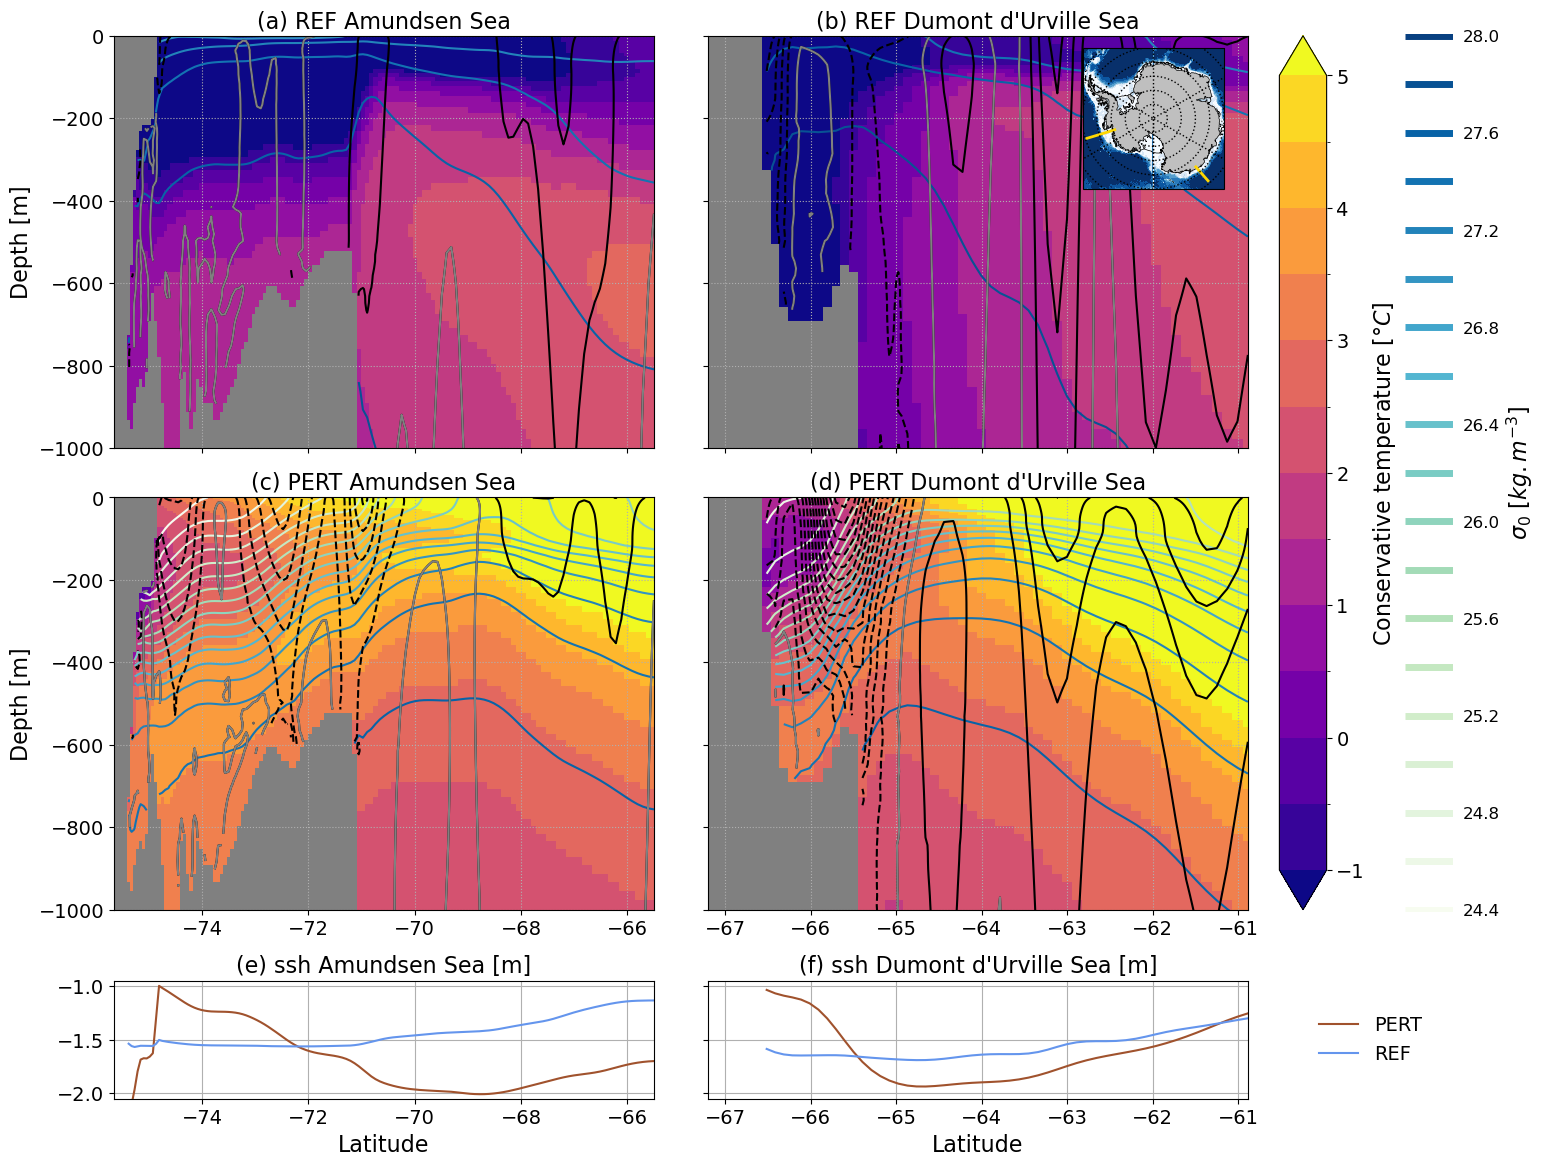

In [5]:
fig=plt.figure(figsize=np.array([400,300]) / 25.4)
ax=[None]*4

#=====================================================================================================================================
# define colormap
cmap = plt.get_cmap('plasma')
cmap.set_bad(color='gray')
norm = colors.BoundaryNorm( np.arange(-1,5+0.01,0.5),cmap.N, extend='both')

# define density levels and colors
lvls=np.arange(24.4,28,0.2)
cmap_cnt=plt.get_cmap('GnBu')

# define velocity levels
lvls_uvel=np.arange(-0.7,0.7001,0.05)

#=====================================================================================================================================
ax[0]=fig.add_subplot(2,2,1)

cb0=plt.pcolormesh(dsREFT_AMU.nav_lat.squeeze(),-dsREFT_AMU.deptht.squeeze(),dsREFT_AMU.votemper.squeeze()
               , norm=norm,cmap=cmap)
cb=plt.contour(dsREFT_AMU.nav_lat.squeeze(),-dsREFT_AMU.deptht.squeeze(),s0_REF_AMU,levels=lvls,cmap=cmap_cnt)
plt.contour(dsREFU_AMU.nav_lat.squeeze(),-dsREFU_AMU.depthu.squeeze(),dsREFU_AMU.vozocrtx.squeeze(), levels=lvls_uvel,colors='k')
plt.contour(dsREFU_AMU.nav_lat.squeeze(),-dsREFU_AMU.depthu.squeeze(),dsREFU_AMU.vozocrtx.squeeze(), levels=[0],colors='gray')
plt.ylim([-1000,0])
plt.xlim([dsPERTT_AMU.nav_lat.squeeze().min(), dsPERTT_AMU.nav_lat.squeeze().max()])
plt.yticks(fontsize=14)
plt.grid('on',linestyle=':')
plt.ylabel('Depth [m]',fontsize=16)
plt.xticks(fontsize=14)
ax[0].set_xticklabels([])
plt.title('(a) REF Amundsen Sea',fontsize=16)

#=====================================================================================================================================
ax[1]=fig.add_subplot(2,2,2)

plt.pcolormesh(dsREFT_EAIS.nav_lat.squeeze(),-dsREFT_EAIS.deptht.squeeze(),dsREFT_EAIS.votemper.squeeze()
               , norm=norm,cmap=cmap)
plt.contour(dsREFT_EAIS.nav_lat.squeeze(),-dsREFT_EAIS.deptht.squeeze(),s0_REF_EAIS,levels=lvls,cmap=cmap_cnt)
plt.contour(dsREFU_EAIS.nav_lat.squeeze(),-dsREFU_EAIS.depthu.squeeze(),dsREFU_EAIS.vozocrtx.squeeze(), levels=lvls_uvel,colors='k')
plt.contour(dsREFU_EAIS.nav_lat.squeeze(),-dsREFU_EAIS.depthu.squeeze(),dsREFU_EAIS.vozocrtx.squeeze(), levels=[0],colors='gray')
plt.xlim([dsPERTT_EAIS.nav_lat.squeeze().min(), dsPERTT_EAIS.nav_lat.squeeze().max()])
plt.ylim([-1000,0])
plt.yticks(fontsize=14)
plt.grid('on',linestyle=':')
ax[1].set_yticklabels([])
plt.xticks(fontsize=14)
ax[1].set_xticklabels([])
plt.title('(b) REF Dumont d\'Urville Sea',fontsize=16)

#=====================================================================================================================================
ax[2]=fig.add_subplot(2,2,3)

plt.pcolormesh(dsPERTT_AMU.nav_lat.squeeze(),-dsPERTT_AMU.deptht.squeeze(),dsPERTT_AMU.votemper.squeeze()
               , norm=norm,cmap=cmap)
plt.contour(dsREFT_AMU.nav_lat.squeeze(),-dsREFT_AMU.deptht.squeeze(),s0_PERT_AMU, levels=lvls,cmap=cmap_cnt)
plt.contour(dsREFU_AMU.nav_lat.squeeze(),-dsREFU_AMU.depthu.squeeze(),dsPERTU_AMU.vozocrtx.squeeze(), levels=lvls_uvel,colors='k')
plt.contour(dsREFU_AMU.nav_lat.squeeze(),-dsREFU_AMU.depthu.squeeze(),dsPERTU_AMU.vozocrtx.squeeze(), levels=[0],colors='gray')
plt.ylim([-1000,0])
plt.xlim([dsPERTT_AMU.nav_lat.squeeze().min(), dsPERTT_AMU.nav_lat.squeeze().max()])
plt.grid('on',linestyle=':')
plt.ylabel('Depth [m]',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('(c) PERT Amundsen Sea',fontsize=16)

#=====================================================================================================================================
ax[3]=fig.add_subplot(2,2,4)
cb0=plt.pcolormesh(dsPERTT_EAIS.nav_lat.squeeze(),-dsPERTT_EAIS.deptht.squeeze(),dsPERTT_EAIS.votemper.squeeze()
               , norm=norm,cmap=cmap)
cb=plt.contour(dsREFT_EAIS.nav_lat.squeeze(),-dsREFT_EAIS.deptht.squeeze(),s0_PERT_EAIS, levels=lvls,cmap=cmap_cnt)
plt.contour(dsREFU_EAIS.nav_lat.squeeze(),-dsREFU_EAIS.depthu.squeeze(),dsPERTU_EAIS.vozocrtx.squeeze(), levels=lvls_uvel,colors='k')
plt.contour(dsREFU_EAIS.nav_lat.squeeze(),-dsREFU_EAIS.depthu.squeeze(),dsPERTU_EAIS.vozocrtx.squeeze(), levels=[0],colors='gray')

plt.ylim([-1000,0])
plt.xlim([dsPERTT_EAIS.nav_lat.squeeze().min(), dsPERTT_EAIS.nav_lat.squeeze().max()])
ax[3].set_yticklabels([])
plt.grid('on',linestyle=':')
plt.xticks(fontsize=14)
plt.title('(d) PERT Dumont d\'Urville Sea',fontsize=16)

#=====================================================================================================================================
# Manage space between plots
plt.subplots_adjust(left=0.08,right=0.8, bottom=0.21, top=0.95, wspace=0.1, hspace=0.12)

#=====================================================================================================================================
# Manage colorbar position and design
x0=1.0; x1=0.0; y0=1.0; y1=0.0
for iplt in range(0,3):
    ax[iplt].apply_aspect()
    zbox=ax[iplt].get_position()
    box=[zbox.x0,zbox.x1,zbox.y0,zbox.y1]
    x0=np.min([x0,box[0]])
    x1=np.max([x1,box[1]])
    y0=np.min([y0,box[2]])
    y1=np.max([y1,box[3]])
boxxy=[x0, y0, x1, y1]

cax  = plt.axes([boxxy[2]+0.02, boxxy[1], 0.03, boxxy[3]-boxxy[1]])
cbar = plt.colorbar(cb0, cax=cax, orientation='vertical')
cbar.set_label(label='Conservative temperature [$\degree C$]', fontsize=16)
cbar.ax.tick_params(labelsize=14)

cax  = plt.axes([boxxy[2]+0.10, boxxy[1], 0.03, boxxy[3]-boxxy[1]])
cbar = plt.colorbar(cb, cax=cax, orientation='vertical')
cbar.set_label(label='$\sigma_0$ [$kg.m^{-3}$]', fontsize=16)
cbar.outline.set_visible(False)
cbar.ax.tick_params(labelsize=14, width=0)
cbar.ax.get_children()[2].set_linewidths(5)

#=====================================================================================================================================
# add ssh plot

zbox=ax[2].get_position()
boxxy=[zbox.x0,zbox.x1,zbox.y0,zbox.y1]
cax  = plt.axes([boxxy[0], 0.05, boxxy[1]-boxxy[0], 0.10])
plt.plot(dsPERTT_AMU.nav_lat.squeeze(),dsPERTT_AMU.sossh.squeeze(),'sienna')
plt.plot(dsREFT_AMU.nav_lat.squeeze(),dsREFT_AMU.sossh.squeeze(),'cornflowerblue')
plt.xlim([dsPERTT_AMU.nav_lat.squeeze().min(), dsPERTT_AMU.nav_lat.squeeze().max()])
plt.title('(e) ssh Amundsen Sea [m]', fontsize=16)
plt.ylim([-2.05, -0.95])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Latitude',fontsize=16)
plt.grid('on')

zbox=ax[3].get_position()
boxxy=[zbox.x0,zbox.x1,zbox.y0,zbox.y1]
cax  = plt.axes([boxxy[0], 0.05, boxxy[1]-boxxy[0], 0.10])
plt.plot(dsPERTT_EAIS.nav_lat.squeeze(),dsPERTT_EAIS.sossh.squeeze(),'sienna',label='PERT')
plt.plot(dsREFT_EAIS.nav_lat.squeeze(),dsREFT_EAIS.sossh.squeeze(),'cornflowerblue',label='REF')
plt.xlim([dsPERTT_EAIS.nav_lat.squeeze().min(), dsPERTT_EAIS.nav_lat.squeeze().max()])
plt.ylim([-2.05, -0.95])
plt.title('(f) ssh Dumont d\'Urville Sea [m]', fontsize=16)
cax.set_yticklabels([])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Latitude',fontsize=16)
plt.grid('on')
cax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5),fontsize=14,frameon=False)

#=====================================================================================================================================
# add inset

isf_features   = cartopy.feature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '50m',facecolor='none',edgecolor='k')
coast_features = cartopy.feature.NaturalEarthFeature('physical', 'coastline'                  , '50m',facecolor='0.75',edgecolor='k')

zbox=ax[1].get_position()
boxxy=[zbox.x0,zbox.x1,zbox.y0,zbox.y1]
left, bottom, width, height = [zbox.x1-0.12, zbox.y1-0.13, 0.12, 0.12]
ax2 = fig.add_axes([left, bottom, width, height],projection=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0))

ncid  = Dataset('DATA/OPM026/mesh.nc')
dat   = ncid.variables['bathy_metry'][0,0:500,:].squeeze()
lon2d = ncid.variables['nav_lon'][0:500,:].squeeze()
lat2d = ncid.variables['nav_lat'][0:500,:].squeeze()

ax2.set_extent((-180, 180, -90, -65),ccrs.PlateCarree())
ax2.add_feature(coast_features,linewidth=0.5)
ax2.add_feature(isf_features  ,linewidth=0.5)

vlevel= np.arange(0,4000+0.000001,500)
cmap  = plt.get_cmap('Blues',len(vlevel)-1)
pcol  = plt.pcolormesh(lon2d, lat2d, dat, cmap=cmap, vmin=0, vmax=4000,transform=ccrs.PlateCarree())
cbar.ax.tick_params(labelsize=12)
plt.plot(dsPERTT_AMU.nav_lon.squeeze(),dsPERTT_AMU.nav_lat.squeeze(),'gold',linewidth=2.0, transform=ccrs.PlateCarree())
plt.plot(dsPERTT_EAIS.nav_lon.squeeze(),dsPERTT_EAIS.nav_lat.squeeze(),'gold',linewidth=2.0, transform=ccrs.PlateCarree())

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels= False,
                linewidth=1, color='k', linestyle=':')
gl.xlabels_top = False
gl.ylabels_right = False

#=====================================================================================================================================
# save figure
fig.savefig('fig10.png', format='png', dpi=150)